# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Планируемые шаги исследования:
1. Изучение изначального датасета и находящихся в нем данных.
2. Мероприятия по предобработке данных (проверка на/удаление/замена пропусков, проверка на/удаление/замена аномалий, работа с дублями)
3. Изменения типов данных
4. добавление новых столбцов таких как: средняя цена за 1 кв.м, день/месяц/год публикации, тип этажа, тип дня публикации.
5. Изучение параметров основных метрик и их распределение.
6. Изучение взаимосвязей влияющих на общую стоимость объекта, цену 1 кв.метра и тд

В финале исследования мы должны понимать какие параметры и в какой степени влияют на общую стоимость квартиры, в каких населенных пунктах происходит активная торговля квартирами, где самая дешеваая и самая дорогая недвижимость, сколько в среднем проходит времени для продажи квартиры, а так же как на цену квартиры влияет ею удаленность от центра города.

### Открыть файл с данными и изучить общую информацию. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
try:
    data=pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(5))
data.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для того чтобы открыть файл использовал конструкцию try-except. Чтобы таблица была читаема, выбрал знак табуляции как разделитель. Исходя из поверхностного обзора датафрейма сделал выводы:
1. Столбец cityCenters_nearest привести к змеиному регистру .
2. Нужно поменять типы данных в столбцах для экономии памяти и оптимизации быстродействия.
3. В столбце first_day_exposition надо оставить только дату. 
4. Даже в пяти строках дата сета видны многочисленные NaN, необходимо разобраться удалить/заменить.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'citycenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

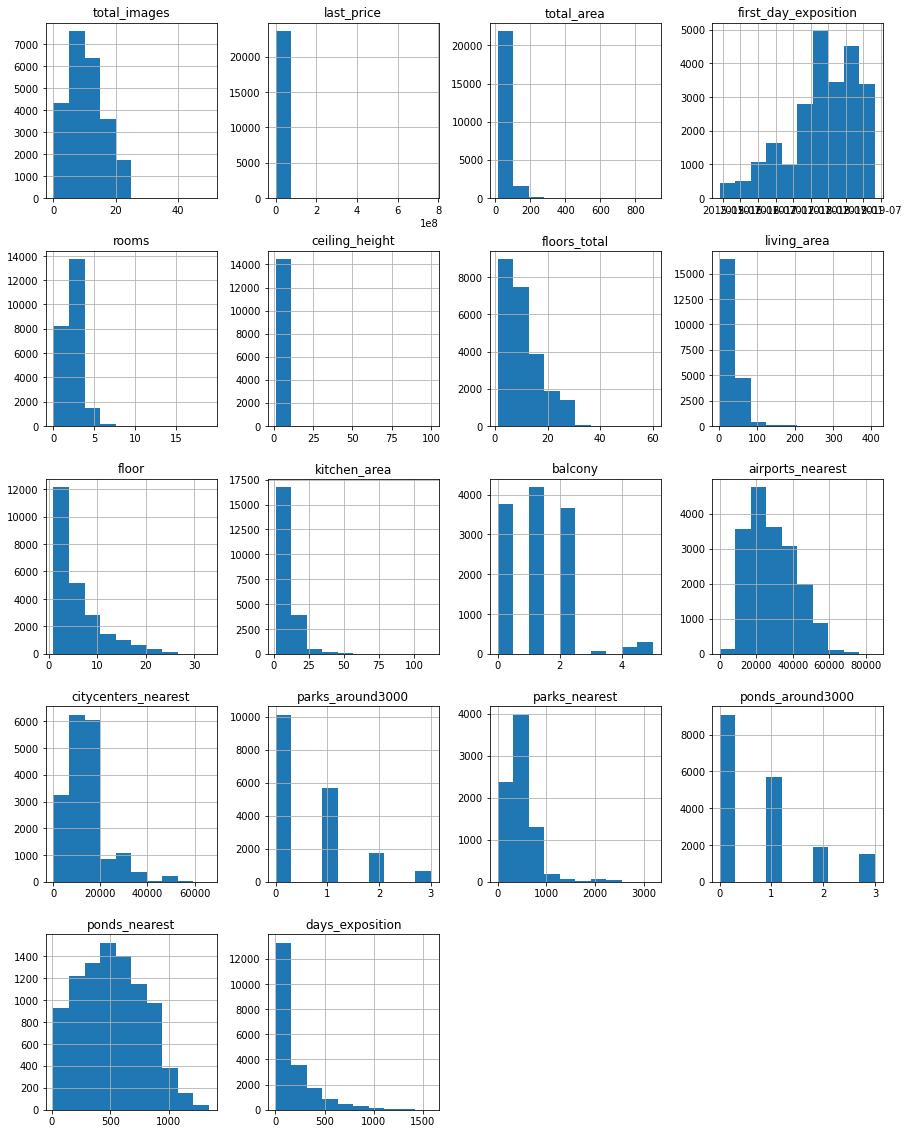

In [2]:
data.rename(columns={'cityCenters_nearest':'citycenters_nearest'}, inplace=True)
#привёл к змеиному регистру

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y.%m.%d')
display(data.head(2)) 
#изменил формат даты на более удобный
data.hist(figsize=(15,20))
#вывел гистограммы столбцов

### Предобработка данных

#### Обработка пропущенных значений.

In [3]:

print(data.isna().sum())
#кол-во пропусков в каждом столбце

data.isna().mean()*100
#доля пропусков в каждом столбце


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
citycenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Изучив информацию о пропусках принял решение:
1. В столбце ceiling_height пропуски заменить медианным значением. Так как медиана не чувствительна к аномалиям и выбросам. Предполагаю, что природа возникновения пропусков исходит от пользователей, не заполняют как несущественный параметр.
2. В столбце floors_total удалить строки с пропусками так как их доля ничтожна 0.36%
3. Столбец is_apartment удалить полностью, так как более 88% информации в нем утеряно.
4. В столбце balcony решил заменить пропуски на ноль, так как природа их возникновения подсказывает, что пользователь при отсутствии балконов просто пропускал обозначение, отсюда появление NAN
5. В столбце locality_name решил строки с пропусками удалить, так как их ничтожно мало 0.2%
6. В столбце airport_nearest пропуски будут заменены на медианное значение, это не исказит данные в статистическом плане.
7. citycenters_nearest по аналогии с airport_nearest пкт №6. Данные в пкт 6 и 7 картографические, причина их потери, предполагаю техническая.
8. Заметил взаимосвязь между кол-ом пропусков в столбцах parks_around3000 и parks_nearest. Предлагаю в parks_around3000 пропуски заменить нулём. В parks_nearest пропуски заменить заведомо аномальным значением 2000, при дальнейшем исследовании мы легко сможем обработать и/или учесть эти значения. Природа возникновения пропусков аналогична пкт 6 и 7
9. В столбцах ponds_around3000 и ponds_nearest предлагаю поступить аналогично пкт №8
10. В столбце days_exposition пропусков можно было бы избежать/минимизировать будь у нас наряду с first_day_exposition колонка last_day_exposition, в реальной ситуации поробовал бы запросить эти данные. Сейчас же предлагаю пропуски в days_exposition заменить медианным значением. В данном случае пропуски могли возникнуть по тех причинам.
11. Очень интересная ситуация с пропусками в столбце kitchen_area. Полагаю, что  часть пропусков связана с наличем квартир свободной планировки и студий, в которых как такового отдельного помещения "кухня" нет. Это отражено в столбцах studio и open_plan значением True. Для пропусков в этих строках предлагаю использовать ноль, для пропусков в строках, где studio, open_plan False предлагаю использовать медианое значение доли кухни в общей площади как коэффицент, на который будем множить общую площадь. Причина возникновения пропусков по моему мнению лежит на стороне пользователей, не все знают площадь кухни, площадь кухни для студий и открытой планировки не высчитывается.
12. living_area вычисляю медианную долю жилой зоны в общей площади. Пропуски заменю произведением общей площади на медианную долю жилой зоны. Причина возникновения пропусков аналогична с kitchen_area. Предположу, все пользователи знают total_area своей недвижимости, а отдельные составляющие total_area площади(комнаты, туалет, кухня) знают не многие. Эту догадку подтверждает, тот факт что в total_area нет пропуков, в kitchen_area & living_area примерно схожее кол-во пропусков 8% и 9%. Тенденция.

In [4]:
med_ceiling=data['ceiling_height'].median()
data['ceiling_height'].fillna(med_ceiling, inplace=True)
data['ceiling_height'].isna().sum()
#убрал пропуски и проверили их наличие в ceiling_height

data=data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()
#Удалил строки с пропусками из floors_total

data=data.drop(['is_apartment'], axis=1)
data.head(3)
#удалил столбец is_apartment

data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()
#Поменял пропуски на нули в balcony

data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum()
# Удалил стрроки с NaN из locality_name

med_aport=data['airports_nearest'].median()
data['airports_nearest'].fillna(med_aport, inplace=True)
data['airports_nearest'].isna().sum()
# Заменил  пропуски медианными значениями

med_centr=data['citycenters_nearest'].median()
data['citycenters_nearest'].fillna(med_centr, inplace=True)
data['citycenters_nearest'].isna().sum()
# Заменил  пропуски медианными значениями

data['parks_around3000'].fillna(0, inplace=True)
data['parks_around3000'].isna().sum()
#Поменял пропуски на нули 

data['parks_nearest'].fillna(2000, inplace=True) 
data['parks_nearest'].isna().sum()
# Заменил пропуски на заведомо аномальное значение(плейсхолдер)

data['ponds_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].isna().sum()
#Поменял пропуски на нули

data['ponds_nearest'].fillna(2000, inplace=True) 
data['ponds_nearest'].isna().sum()
# Заменил пропуски на заведомо аномальное значение(плейсхолдер)

med_days=data['days_exposition'].median()
data['days_exposition'].fillna(med_days, inplace=True)
data['days_exposition'].isna().sum()
# Заменил  пропуски медианными значениями

idx=data.query('studio==True or open_plan==True or rooms==0').index
for x in idx:
    data.loc[x,'kitchen_area']=0
#Квартиры открытой планировки и студии вместо пропусков в kitchen_area имеют ноль.

med_kitch=(data['kitchen_area']/data['total_area']).median()
Нашёл медианную долю кухни в общей площади, буду использовать как коэффицент
data['kitchen_area'].fillna((data['total_area']*med_kitch), inplace=True)
#заменяю пропуски умножая общую площадь на долю кухни


med_liv=(data['living_area']/data['total_area']).median()
Нашёл медианную долю жилой зоны в общей площади, буду использовать как коэффицент
data['living_area'].fillna((data['total_area']*med_liv), inplace=True)
# заменяю пропуски умножая общую площадь на долю жилой зоны

data.isna().sum()
#проверка показала отссутствие Nan в таблице

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1865
floor                      0
studio                     0
open_plan                  0
kitchen_area            2009
balcony                    0
locality_name              0
airports_nearest           0
citycenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

In [5]:
data[data.days_exposition.isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,2000.0,0.0,2000.0,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.65,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.3,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,2000.0,0.0,2000.0,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.7,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,2000.0,0.0,2000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,2000.0,0.0,2000.0,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,2000.0,0.0,2000.0,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,26757.0,13096.5,0.0,2000.0,0.0,2000.0,NaN


In [6]:
#len(data['total_area'])
#Всего в столбце 23565
#data[data['kitchen_area']+data['living_area']<data['total_area']].count()
#Удовлетворяют условию 23396 строк
#data[data['kitchen_area']+data['living_area']>=data['total_area']].count()
# неудовлетворяют условию 169 строк. Мой метод замены пропусков не сработал. Исправляю.


for num in data['rooms'].unique():    
    data_tmp = data.query('rooms == @num or (total_area > 0 or kitchen_area> 0 or total_area>kitchen_area)').copy()
    data_tmp['kitch_coeff'] = data_tmp['kitchen_area']/data_tmp['total_area']        
    data.loc[data['rooms']==num,'avg_kitch_coeff'] = data_tmp['kitch_coeff'].mean()
    data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*data['avg_kitch_coeff'])
#для замены пропусков kitchen_area

for num in data['rooms'].unique():    
    data_tmp = data.query('rooms == @num and total_area > 0 and living_area> 0 and total_area>living_area').copy()
    data_tmp['living_coeff'] = data_tmp['living_area']/data_tmp['total_area']        
    data.loc[data['rooms']==num,'avg_living_coeff'] = data_tmp['living_coeff'].mean()
    data['living_area'] = data['living_area'].fillna(data['total_area']*data['avg_living_coeff'])
#для замены пропусков living_area


In [7]:
data[data['kitchen_area']+data['living_area']>data['total_area']].count()

total_images            106
last_price              106
total_area              106
first_day_exposition    106
rooms                   106
ceiling_height          106
floors_total            106
living_area             106
floor                   106
studio                  106
open_plan               106
kitchen_area            106
balcony                 106
locality_name           106
airports_nearest        106
citycenters_nearest     106
parks_around3000        106
parks_nearest           106
ponds_around3000        106
ponds_nearest           106
days_exposition          92
avg_kitch_coeff         106
avg_living_coeff        106
dtype: int64

##### Изменение типов данных.

In [8]:
data.info(memory_usage='deep')
#информация о типах данных в столбцах и использовании памяти

def diapint64(column):
    for col in columns:
        print(f'Диапозон  значений в столбце {col}  от {data[col].min()} до {data[col].max()}')
        print()
columns=['ponds_nearest','parks_nearest','days_exposition','airports_nearest','citycenters_nearest','last_price','total_images', 'rooms', 'floor', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']    
diapint64(columns) 
# проверяю диапазон значений для колонок с типом данных int64
for col in columns:
    if data[col].max()<=254: 
        data[col]=data[col].astype('uint8')
    elif 254<data[col].max()<65534: 
        data[col]=data[col].astype('uint16')
    else: 
        data[col]=data[col].astype('uint32')
#меняю тип данных на uint8  
 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   studio                23565 non-null  bool          
 10  open_plan             23565 non-null  bool          
 11  kitchen_area          23565 non-null  float64       
 12  balcony               23565 non-null  float64       
 13  locality_name   

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [9]:
def diapfloat(column):
    for col in columnsfloat:
        print(f'Диапозон  значений в столбце {col}  от {data[col].min()} до {data[col].max()}  ')
        print()
columnsfloat=['total_area', 'ceiling_height', 'living_area', 'kitchen_area' ]    
diapfloat(columnsfloat) 
# проверяю диапазон значений для колонок с типом данных int64
for col in columnsfloat:
    if data[col].max()>100000: 
        data[col]=data[col].astype('float32')
    else: 
        data[col]=data[col].astype('float16')
#меняю тип данных на float16/float32 взависимости от диапазона значений.  

data.info(memory_usage='deep') 

Диапозон  значений в столбце total_area  от 12.0 до 900.0  

Диапозон  значений в столбце ceiling_height  от 1.0 до 100.0  

Диапозон  значений в столбце living_area  от 2.0 до 415.18596925565953  

Диапозон  значений в столбце kitchen_area  от 0.0 до 112.0  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float16       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float16       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float16       
 8   floor                 23565 non-null  int64  

Изучил каждую колонку. По смыслу данных колонки соотнёс какие данные в ней должны быть, целочисленные, либо с дробной частью, либо целочисленные беззнаковые(uint). Использовал тип uint в столбцах, в которых не может быть отрицательных значений. Для колонок с дробными значениями использовал float16 и float32 в зависимости от диапозона значений. В столбце с названиями населенных пунктов была идея использовать тип данных category, доля уникальных значений ко всем строкам около 1,5%, но идею отмёл так как не уверен, что методы поиска неявных дубликатов будут работать корректно с данными такого типа. Написал функцию возвращающую диапазон значений, а так же цикл, который по идёт по списку названий столбцов и в зависимости от максимального значения столбца изменяет тип его данных. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>
 Отличная работа! Так сэкономили память

#### Обработка неявных дубликатов.

In [10]:
prefix=['городской','городского типа', 'посёлок', 'поселок', 'деревня', 
         'коттеджный', 'имени','при железнодорожной', 'станции',
        'садоводческое некоммерческое товарищество', 'садовое товарищество', 'село']
#Создаю список типов населенных пунктов, которые удалю из столбца locality_name

for val in prefix:
    data['locality_name']=data['locality_name'].str.replace(val, '')
#цикл проходит по элементам списка и на каждой итерации заменяет тип нас.пнк из столбца'locality_name' на пробел  

data['locality_name']=data['locality_name'].str.strip()
#метод .strip() удаляет пробел в начали строки, появившийся как следствие работы метода .replace()

len(data['locality_name'].sort_values().unique()) 
#Смотрим и подсчитывае кол-во уникальных значений в столбце locality_name
# до обработки было 364 уникальных значения- после 305
data.duplicated().sum()
#дубликатов 0

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>
Здорово, что поработал с неявными дублями. Получилась хорошая функция

#### Обработка аномальных значений.

In [11]:
columns=list(data.columns.values)
for val in columns:
    print(val)
    print(sorted(data[val].unique()))
    print()
#цикл выводящий сортированные по возрастанию уникальные значения столбцов датасета.    

len(data.query('2>ceiling_height or ceiling_height>10'))/len(data)*100
data=data[(data['ceiling_height']<=10)]
data=data[(data['ceiling_height']>=2.5)]
#Проверил столбец ceiling_height на аномалии, поставил условие что аномальным считаем высоту до 2,5м и от 10м
#Доля строк с аномалиями 0,1% можно удалить

#при проверки колонки kithchen_area наткнулся на значение 100
data[data['kitchen_area']==100]
#было подозрение, что это аномальное значение, проверил строку с этим значением. 
#пришел к выводу, что в кваритре площадью 590кв.м. может быть кухня 100кв.м

#В столбцах ponds_nearest и parks_nearest есть аномальное значение -1, но это плейс холдер добавленый мной при работе с NaN




total_images
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 39, 42, 50]

last_price
[12190.0, 430000.0, 440000.0, 450000.0, 470000.0, 480000.0, 490000.0, 500000.0, 520000.0, 530000.0, 550000.0, 560000.0, 565000.0, 580000.0, 585000.0, 590000.0, 600000.0, 620000.0, 630000.0, 650000.0, 660000.0, 680000.0, 690000.0, 700000.0, 710000.0, 720000.0, 730000.0, 740000.0, 750000.0, 760000.0, 770000.0, 777000.0, 780000.0, 790000.0, 799000.0, 800000.0, 820000.0, 850000.0, 860000.0, 869000.0, 870000.0, 880000.0, 890000.0, 900000.0, 910000.0, 920000.0, 945750.0, 950000.0, 965780.0, 970000.0, 980000.0, 990000.0, 995000.0, 999000.0, 999999.0, 1000000.0, 1010000.0, 1020000.0, 1030000.0, 1050000.0, 1060000.0, 1070000.0, 1080000.0, 1090000.0, 1099000.0, 1100000.0, 1110000.0, 1130000.0, 1150000.0, 1170000.0, 1180000.0, 1190000.0, 1199000.0, 1200000.0, 1220000.0, 1230000.0, 1240000.0, 1249000.0, 1250000.0, 1260000.0, 1270000

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_kitch_coeff,avg_living_coeff
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,False,...,Санкт-Петербург,24447.0,4666.0,1.0,767,0.0,2000,14.0,0.185488,0.69322


### Посчитать и добавить в таблицу новые столбцы

In [12]:
data['sq_meter_price']=data['last_price']/data['total_area']
data['sq_meter_price']=data['sq_meter_price'].astype('float32')
# создал столбец с ценой 1кв.м.

data['week_day']=data['first_day_exposition'].dt.dayofweek
#определил день недели по дате

data.loc[data['week_day']!=0,'week_day']=1
data['week_day']=data['week_day'].astype('uint8')
#все дни не являющиеся понедельником получили значение 1
#переделал тип данных на uint8 в week_day

data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['month'].astype('uint8')
data['year'] = data['year'].astype('uint16')
#Создал стобцы и поместил в них год и месяц публикации объявления.
#переделал тип данных на uint8/16
def floor_type(data):
    total_floors=data['floors_total']
    floor_numb=data['floor']
    if floor_numb==1:
        return 'первый'
    elif floor_numb==total_floors:
        return 'последний'
    else:
        return 'другой'
#Пишу функцию,которая при выполнении условий присвоит этажу квартиры значение 'первый'/'последний'/'другой'
data['floor_type']=data.apply(floor_type,axis=1)
data[data['floor_type']=='последний']
#применил функцию к датафрейму построчно, сделал проверку выборочную

data['citycenters_near_km']=data['citycenters_nearest']/1000
data['citycenters_near_km']=data['citycenters_near_km'].astype('uint8')
#создал столбцец с расстоянием до центра города в км, округлил до целых c помощью изменения типа данных на uint8.
data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,avg_kitch_coeff,avg_living_coeff,sq_meter_price,week_day,month,year,floor_type,citycenters_near_km
0,20,13000000.0,108.00000,2019-03-07,3,2.699219,16.0,51.000000,8,False,...,755,NaN,0.185488,0.625518,120370.367188,1,3,2019,другой,16
1,7,3350000.0,40.40625,2018-12-04,1,2.650391,11.0,18.593750,1,False,...,2000,81.0,0.185488,0.486077,82907.968750,1,12,2018,первый,18
2,10,5196000.0,56.00000,2015-08-20,2,2.650391,5.0,34.312500,4,False,...,574,558.0,0.185488,0.579535,92785.710938,1,8,2015,другой,13
3,0,64900000.0,159.00000,2015-07-24,3,2.650391,14.0,99.437500,9,False,...,234,424.0,0.185488,0.625518,408176.093750,1,7,2015,другой,6
4,2,10000000.0,100.00000,2018-06-19,2,3.029297,14.0,32.000000,13,False,...,48,121.0,0.185488,0.579535,100000.000000,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.75000,2017-03-21,3,3.699219,5.0,73.312500,3,False,...,381,NaN,0.185488,0.625518,72523.367188,1,3,2017,другой,4
23695,14,3100000.0,59.00000,2018-01-15,3,2.650391,5.0,38.000000,4,False,...,2000,45.0,0.185488,0.625518,52542.371094,0,1,2018,другой,13
23696,18,2500000.0,56.68750,2018-02-11,2,2.650391,3.0,29.703125,1,False,...,2000,NaN,0.185488,0.579535,44101.433594,1,2,2018,первый,13
23697,13,11475000.0,76.75000,2017-03-28,2,3.000000,17.0,44.468750,12,False,...,196,602.0,0.185488,0.579535,149511.406250,1,3,2017,другой,10


### Провёл исследовательский анализ данных

#### Изучил следующие параметры объектов

Text(0, 0.5, 'количество объявлений')

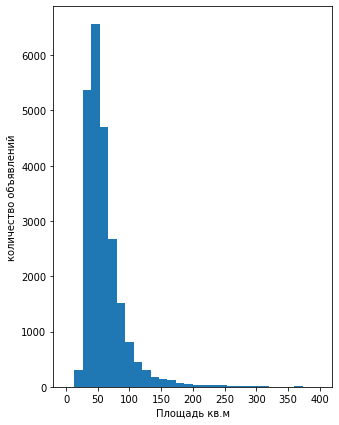

In [13]:
data['total_area'].plot(kind='hist',bins=30, figsize=(5,7),range=(0, 400))
# общая площадь
plt.xlabel("Площадь кв.м")
plt.ylabel("количество объявлений")

По гистограмме видно, что больше всего квартир в датасете имеют площадь от 25 до 50 кв.метров. Так же распространены квартиры от 50 до 80 кв.метров. Более 80 кв.м объекты недвижимости встречаются реже. 

Text(0, 0.5, 'Количество объявлений')

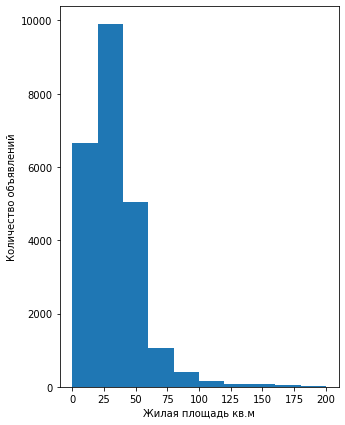

In [14]:
data['living_area'].plot(kind='hist', figsize=(5,7),range=(0, 200))
# жилая площадь
plt.xlabel("Жилая площадь кв.м")
plt.ylabel("Количество объявлений")

Квартиры с площадью жилой зоны от 25кв.м до 35 кв.метров являются наиболее представленными в таблице, так же пик графика есть и
на площадях от 15 до 25кв.м. Квартиры с площадью жилой зоны более 50 кв.м встречаются значительно реже.

Text(0, 0.5, 'Количество объявлений')

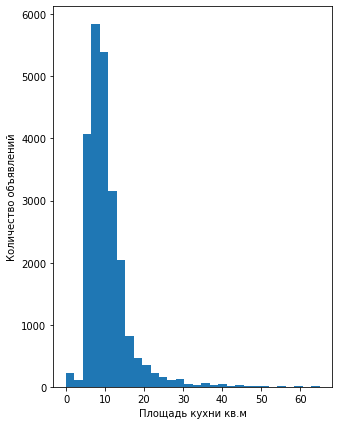

In [15]:
data['kitchen_area'].plot(kind='hist',bins=30, figsize=(5,7),range=(0,65))
plt.xlabel("Площадь кухни кв.м")
plt.ylabel("Количество объявлений")

Самыми распрстраненными квартирами в датасете являются объекты с площадью кухонь от 5 до 10 кв.м. Так же значительную долю занимают квартиры с площадью кухонь от 10 до 14 кв.м Квартиры с кухнями более 20кв.м встречаются редко.

4650000.0

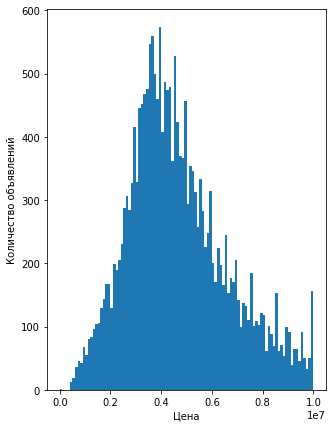

In [16]:
data['last_price'].plot(kind='hist',bins=100, figsize=(5,7), range=(0,10000000))
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
data['last_price'].median()
#Самая распространенная цена на квартиры в районе 4млн.р. График напоминает нормальное распределение с медианой по середине.

Самая распространенная цена на квартиры в районе 4млн.р. График напоминает нормальное распределение с медианой по середине. Хорошо видны квартили и квартильный размах. В правой части графика выбивающиеся значения(выбросы)-очень дорогая недвижимость, слева наоборот дешевая недвижимость.

Text(0, 0.5, 'Количество объявлений')

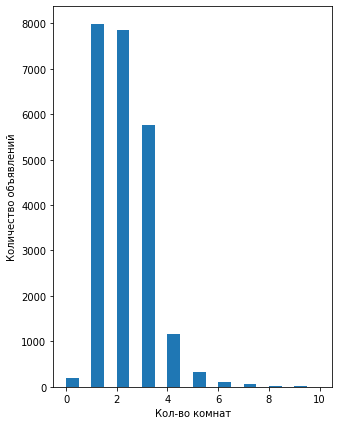

In [17]:
data['rooms'].plot(kind='hist',bins=20, figsize=(5,7),range=(0,10))
plt.xlabel("Кол-во комнат")
plt.ylabel("Количество объявлений")


Почти одинаковые кол-ва квартир однокомнатных и двухкомнатных. Так же распространены трехкомнатные квартиры. 
Четырех и более комнат квартир меньшинство.

Text(0, 0.5, 'Количество объявлений')

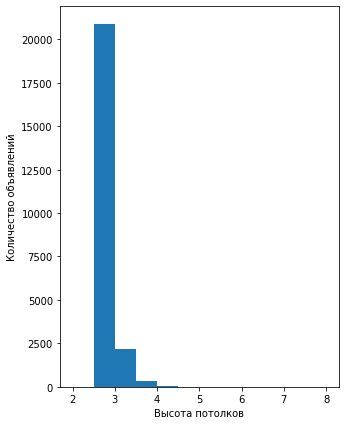

In [18]:
data['ceiling_height'].plot(kind='hist',bins=12, figsize=(5,7),range=(2,8))
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")


Подавляющее число квартир имеют высоту потолков 2,5 м. Квартиры с высотой потолков выше 3м встречаются редко.

Text(0, 0.5, 'Количество объявлений')

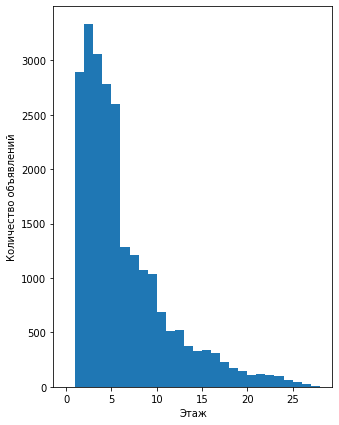

In [19]:
data['floor'].plot(kind='hist',bins=28, figsize=(5,7),range=(0,28))
plt.xlabel("Этаж")
plt.ylabel("Количество объявлений")

На гистограмме виден пик, самые распространенные квартиры в порядке убывания на втором этаже, тертьем и первом, четвернтом и пятом. С 6го по 10ый этаж так же крупная доля квартир. 

<AxesSubplot:>

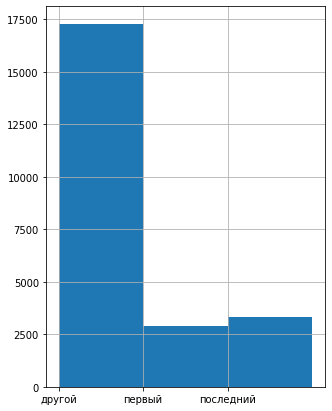

In [20]:
data['floor_type'].hist(bins=3, figsize=(5,7),range=(0,3))

Подтвердилась информация с передыдущей гистограммы, где самыми распространенными стали квартиры на втором и третьем этаже, что соответствует типу 'другой'

Text(0, 0.5, 'Количество объявлений')

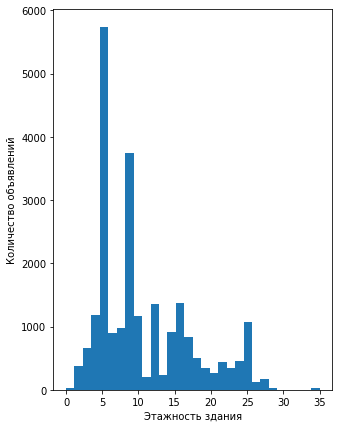

In [21]:
data['floors_total'].plot(kind='hist',bins=30, figsize=(5,7),range=(0,35))
plt.xlabel("Этажность здания")
plt.ylabel("Количество объявлений")

Самыми распространенными в таблице являются квартиры из пяти и девяти этажных зданий. 

Text(0, 0.5, 'Количество объявлений')

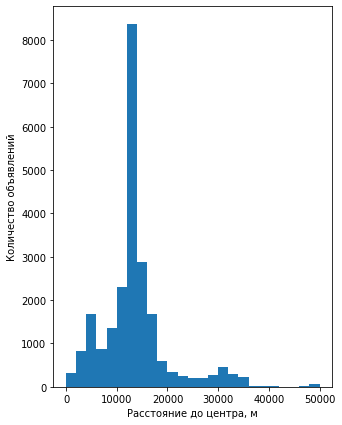

In [22]:

data['citycenters_nearest'].plot(kind='hist',bins=25, figsize=(5,7), range=(0,50000))
plt.xlabel("Расстояние до центра, м")
plt.ylabel("Количество объявлений")

Сильнее всего распространены квартиры находящиеся от центра города в 12000-14000м.

Text(0, 0.5, 'Количество объявлений')

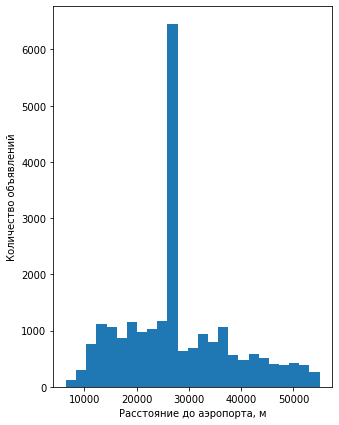

In [23]:
data['airports_nearest'].plot(kind='hist',bins=25, figsize=(5,7), range=(6500,55000))
data['airports_nearest'].median()
plt.xlabel("Расстояние до аэропорта, м")
plt.ylabel("Количество объявлений")

По графику виден пик в районе 26000м, природа его появления заключается в том что я добавлял вместо пропусков медианное значение, расположенное в диапазоне между 26 и 27 тыс метров удалённости от аэропорта. Следовательно можно сказать, что чаще других встречаются квартиры с удалением от аэропорта от 10000 до 27000м.

Text(0, 0.5, 'Количество объявлений')

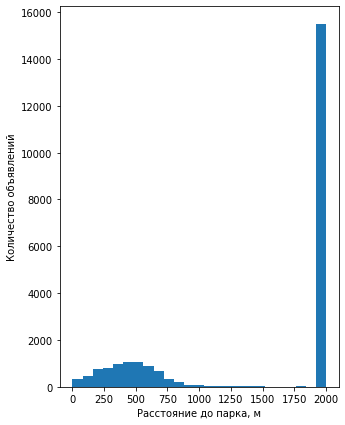

In [24]:
data['parks_nearest'].plot(kind='hist',bins=25, figsize=(5,7), range=(0,2000))
plt.xlabel("Расстояние до парка, м")
plt.ylabel("Количество объявлений")

На графике виден пик в районе 2000м- это плейсхолдер, которым я заместил Nan. Это значение не соответствует действительности, поэтому рассмптриваем левую часть графика. Большинство квартир, имеющих достоверные данные об удаленности от ближайшего парка, находятся в пределах от 300 до 500 м от парка.

Text(0, 0.5, 'Количество объявлений')

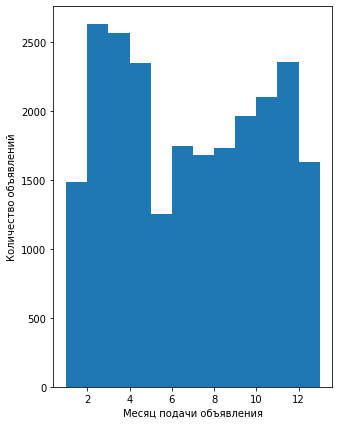

In [25]:
data['month'].plot(kind='hist',bins=12, figsize=(5,7), range=(1,13))
plt.xlabel("Месяц подачи объявления")
plt.ylabel("Количество объявлений")

Как видно из гистограммы есть два пика, когда размещаются объявлени о продаже. Весенний пик февраль-апрель и осенний сентябрь-ноябрь. Самый не популярный месяц для размещения объявлений- май.

Text(0, 0.5, 'Количество объявлений')

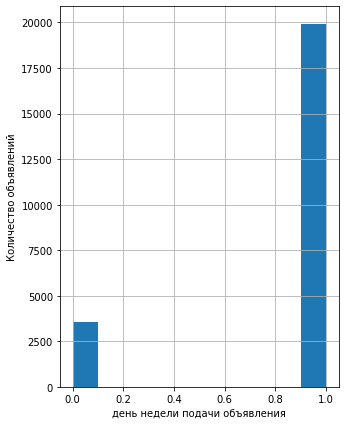

In [26]:
data['week_day'].hist(figsize=(5,7))
plt.xlabel("день недели подачи объявления")
plt.ylabel("Количество объявлений")

Из графика видно, что объявления чаще размещают в дни со вторника и до воскресенья включительно.

#### Изучить как быстро продавались квартиры.

count    20312.000000
mean       180.874852
std        219.964136
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

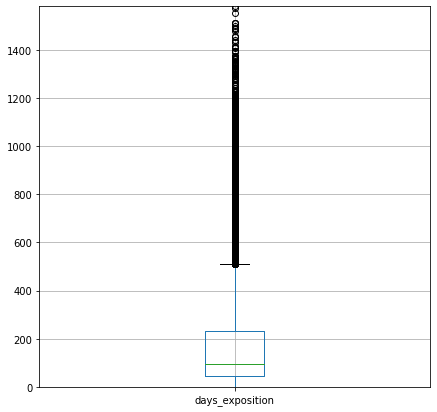

In [27]:
data['days_exposition'].plot(kind='box', grid=True, figsize=(7,7))
plt.ylim(0, 1580)
data['days_exposition'].describe()
#Решил использовать диаграмму размаха и метод .describe()

Для выполнения задания решил использовать диаграмму размаха и метод .describe(). Исходя из диаграммы видно, что медиана(зеленая линия) находится в районе 100 дней, именно столько обычно занимает продажа квартиры( .describe() подтверждает- 50% 95.0). Быстрыми продажами можно назвать значения входящие в первый квартиль(первые 25% выборки) а именно значения от 1 до 45 дней.
От 95 до 198 дней значения третьей квартили. Межквартильный размах от 45 до 198 дней показывает нормально распределенные значения вокруг медианы и исключает 25% самых быстрых и 25% самых медленных продаж. За пределами третьей квартили начинается "ус" заканчивающийся ожиданием продажи- около 410дней, за границей этого уса знаxения более 410 дней можно считать необычайно долгими продажами(выбросами)  

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [28]:
# Вычислю коэффицент Пирсона, чтоб установить наличие/отсутствие взаимосвязи
data['last_price'].corr(data['total_area'])
#0.65
data['last_price'].corr(data['living_area'])
#0.58
data['last_price'].corr(data['kitchen_area'])
#0.50
data['last_price'].corr(data['rooms'])
#0.36
data['last_price'].corr(data['week_day'])
#0,0008
data['last_price'].corr(data['month'])
#0,003
data['last_price'].corr(data['year'])
#-0.04


-0.0428960771782286

Исходя из значений коэффицента Пирсона (КП) видно следущее:
1. Прослеживается положительная корреляция между полной стоимостью и площадью квартиры. При увеличении площади, будет расти и цена. КП=0.65

2. Прослеживается положительная корреляция между полной стоимостью и площадью жилой зоны. При увеличении площади жилой зоны, будет расти и цена. КП=0.58

3. Более слабо прослежиается взаимосвязь между полной стоимостью квартиры и площадью кухни. Корреляция положительная. КП=0.5

4. Слабая положительная корреляция величин цены квартиры и количества комнат КП=0.36

5. Коэффицент Пирсона указывает на отсутствие взаимосвязи цены квартиры и даты размещения объявления (неделя/месяц/год КП=0,0008/0,003/0,04 соответственно)

6. Для floor_type нет возможности посчитатать КП так как в столбце категориальные значения.


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

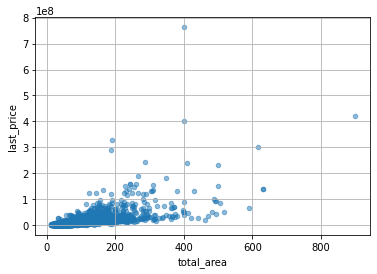

In [29]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.5)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

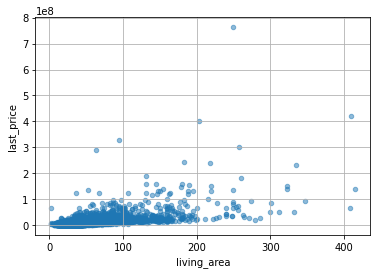

In [30]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.5)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

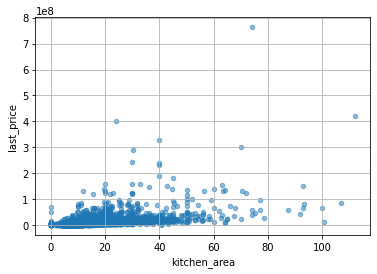

In [31]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.5)

<AxesSubplot:>

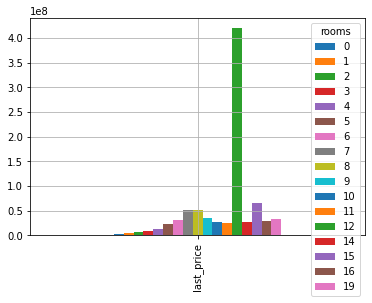

In [32]:
data_rooms=(data.pivot_table(columns='rooms', values='last_price', aggfunc='mean'))
data_rooms.plot(kind='bar', grid=True)

<AxesSubplot:>

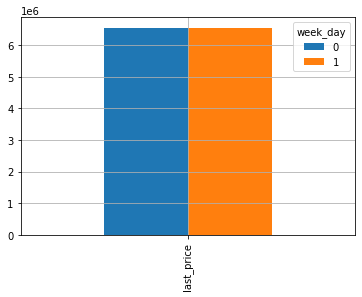

In [33]:
data_week=(data.pivot_table(columns='week_day', values='last_price', aggfunc='mean'))
data_week.plot(kind='bar', grid=True)

<AxesSubplot:>

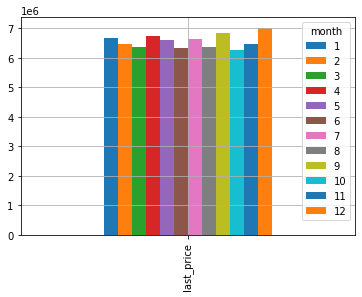

In [34]:
data_month=(data.pivot_table(columns='month', values='last_price', aggfunc='mean'))
data_month.plot(kind='bar', grid=True)

<AxesSubplot:>

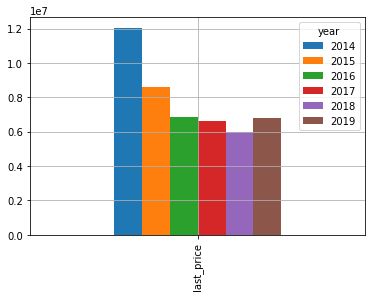

In [35]:
data_year=(data.pivot_table(columns='year', values='last_price', aggfunc='mean'))
data_year.plot(kind='bar', grid=True)

<AxesSubplot:>

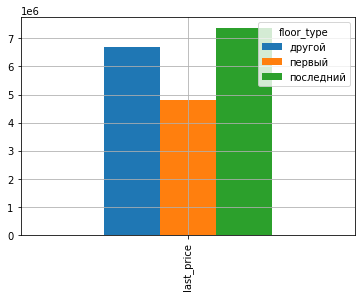

In [36]:
data_floor=(data.pivot_table(columns='floor_type', values='last_price', aggfunc='mean'))
data_floor.plot(kind='bar', grid=True)

Для описания взаимосвязи стоимости объекта и таких величин как: количество комнат, дата публикации нед/мес/год и тип этажа построил столбчатые диаграммы так как диаграммма рассеяния для них неинформативна. 

Вывод: на общую стоимость квартиры наиболее сильно повлияли такие факторы как общая площадь квартиры, площадь жилой зоны, площадь кухни. Зависимость величин положительная. Так же есть влияние кол-ва комнат с неясным для меня пиком цены 12комнатных квартир. День недели и месяц публикации почти не влияют на цену, но год публикации, несмотря на значение коэф. Пирсона, имеет влияние(в 2014году продавались более дорогие квартиры). Зависимость цены квартиры от типа этажа выглядит так- более дорогие квартиры находятся на последних этажах, более дешевые на первых.  

In [37]:
data[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()

,last_price,total_area,rooms,citycenters_nearest
last_price,1.000000,0.653690,0.363487,-0.190749
total_area,0.653690,1.000000,0.758928,-0.210415
rooms,0.363487,0.758928,1.000000,-0.160385
citycenters_nearest,-0.190749,-0.210415,-0.160385,1.000000


К выше сказанному была замечена, хоть и слабая, но обратная взаимосвязь между 'citycenters_nearest' и 'last_price'- соответсвтует логике. Чем выше/больше расстояние от центра, тем ниже цена недвижимости. Коэффицент пирсона довольно низкий, так как на него влияют высокие цены объектов недвижимости загородной.

Так же выявил положительную взаимосвязь между кол-ом комнат ценой и общей площадью, выглядит правдоподобно и очевидно.
Взаимосвязь citycenters_nearest c другими велечинами довольна слабая и отрицательная. Чем дальше от города, тем дешеле недвижимость, тем меньше ее площадь и кол-во комнат

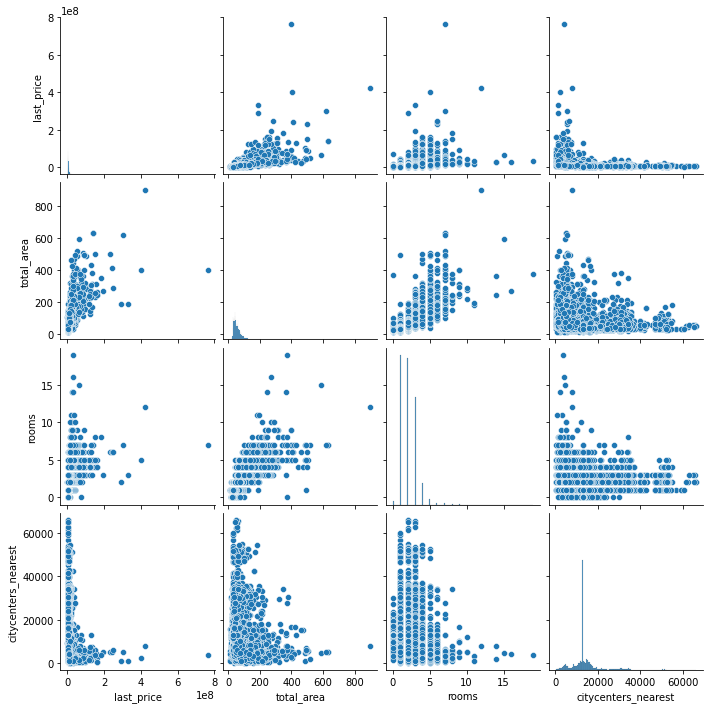

In [38]:
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'citycenters_nearest']])

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

locality_name,Всеволожск,Выборг,Гатчина,Колпино,Кудрово,Мурино,Парголово,Пушкин,Санкт-Петербург,Шушары
sq_meter_price,65789.476562,58307.691406,67864.5625,74725.273438,95588.234375,86249.382812,91784.78125,99993.59375,104812.445312,76829.265625


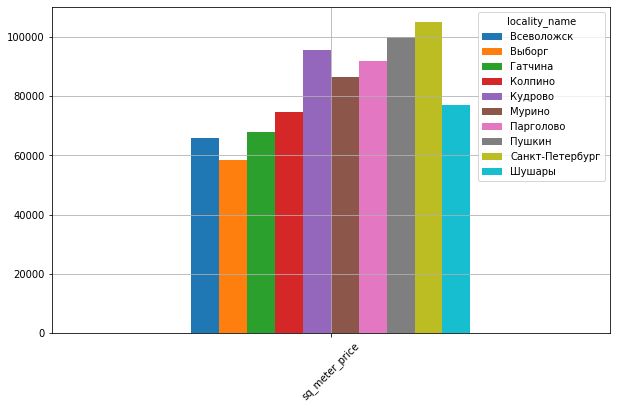

In [39]:
top_ten=data['locality_name'].value_counts().index[0:10]
#в переменной top_ten названия десяти населенных пунктов с самым большим кол-ом объявлений
data_top=data.query('locality_name in @top_ten').pivot_table(columns='locality_name', values='sq_meter_price', aggfunc='median').plot(kind='bar', figsize=(10,6), grid=True, rot=45)
#в data_top находится отфильтрованнный по @top_ten исходный датафрейм.
#Создал сводную таблицу по нас.пунктам вычисляющую среднюю цену за 1 кв.метр.
#По данным сводной таблицы построил столбчатую диаграмму для наглядности самой высокой и низкой цены за 1 кв.м
data_top=data.query('locality_name in @top_ten').pivot_table(columns='locality_name', values='sq_meter_price', aggfunc='median')
data_top


В сводной таблице указана средняя стоимость за 1 кв.м недвижимости сгруппированная по населенным пунктам. На столбчатой диаграмме можно наглядно увидеть, что самый дешевый 1 кв.метр в Выборге 58152р, самый дорогой в Санкт-Петербурге 104811р.

In [40]:
data_top.reset_index()
sorted(data_top)

['Всеволожск',
 'Выборг',
 'Гатчина',
 'Колпино',
 'Кудрово',
 'Мурино',
 'Парголово',
 'Пушкин',
 'Санкт-Петербург',
 'Шушары']

#### Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра. 

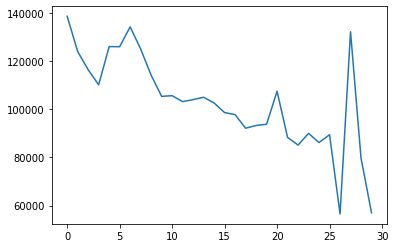

In [41]:
#data_spb=data.query('locality_name=="Санкт-Петербург"').pivot_table(columns='citycenters_near_km', values='sq_meter_price', aggfunc='median')
# не смог сделать адекватную визуализацию для сводной таблицы
spb=data[data['locality_name']== 'Санкт-Петербург']
spb_price_km= spb.groupby('citycenters_near_km')['sq_meter_price'].median()
plt.plot(spb_price_km)


На графике видна общая тенденция уменьшения средней цены 1кв.метра по мере удаления от центра города. Есть несколько пиковых значений: на 4ом, 6ом, 20ом и 27ом киллометре удаления. Могу предположить, что на этом удаленнии от центра располагаются более дорогие объекты недвижимости, например элитные посёлки или жилые комплексы.

### Общий вывод

1. В начальном этапе анализа датасета, были выявленны пропуски данных в столбцах, заменил пропуски на:

Столбцы\\\                 %NaN       \\\ Действия

ceiling_height          38.8       заменил медианой 

floors_total             0.4       удалил строки

living_area              8.0       заменил произв. коэф и общ. площ-ди

is_apartment            88.0       удалил столбец

kitchen_area             9.6       заменил произв. коэф и общ. площ-ди

balcony                 48.6       заменил на нули

locality_name            0.2       удалили строки

airports_nearest        23.4       заменил медианой


citycenters_nearest     23.3       заменил медианой

parks_around3000        23.3       заменил на нули

parks_nearest           65.9       заменил на плейсхолдер

ponds_around3000        23.3       заменил на нули

ponds_nearest           61.5       заменил на плейсхолдер

days_exposition         13.4       заменил медианой

2. Изменил типы данных в колонках. Изучил каждую колонку. По смыслу данных колонки соотнёс какие данные в ней должны быть, целочисленные, либо с дробной частью, либо целочисленные беззнаковые(uint). Использовал тип uint в столбцах, в которых не может быть отрицательных значений. Для колонок с дробными значениями использовал float16 и float32 в зависимости от диапозона значений. В столбце с названиями населенных пунктов была идея использовать тип данных category, доля уникальных значений ко всем строкам около 1,5%, но идею отмёл так как не уверен, что методы поиска неявных дубликатов будут работать корректно с данными такого типа. Написал функцию возвращающую диапазон значений, а так же цикл, который  идёт по списку названий столбцов и в зависимости от максимального значения столбца изменяет тип его данных.

3. Обработал неявные дубликаты в столбце locality_name. Убрал вспомогательные слова. Удалил 59 неявных дубликатов.

4. Проверил столбцы на аномальные значения. Удалил из ceiling_height строки с аномальными высотами потолков.

5. После предобработки данных изучил гистограммы основных столбцов датасета и написал наблюдения. см. пнкт. 4.1

6. Спомощью коэффицента Пирсона выяснил, что стоимость квартиры положительно взаимосвязана с её полной площадью, площадью жилой зоны и площадью кухни, в меньшей степени стоимость взаимосвязана с кол-ом комнат(взаимосвязь слабая 0,36 КП). Не нашел взаимосвязи стоимости квартиры и дня/месяца/года публикации объявления. Спомощью столбчатой диаграммы выяснил, что дорогие квартиры чаще расположены на последнем этаже, либо любом другом, кроме первого.

7. Удалось выяснить десять самых популярных населенных пунктов см.пнкт. 4.4, установить тот факт, что самый дорогой кв.м жилья в Санкт-Петербурге, а самый дешевый в Выборге.

8. Была замечена тенденция: чем дальше от центра Санк-Петербурга находится квартира, тем дешевле стоимость одного квадратного метра. Но есть ряд исключений, связал это с наличием элитных посёлков и ЖК на удаленнии от центра города.

9. Удалось выяснить среднюю с тоимость за 1 кв.м
- Санкт-Петербург 104812р
- Пушкин 99994р
- Кудрово 95588р
- Мурино 86249р
- Шушары 76829р
- Колпино 74725р
- Гатчина 67864р
- Всеволожск 65789
- Выборг 58307р

Остальные цены за кв.м указаны в сводной таблице в след ячейке.


    

In [42]:
data_top1=data.pivot_table(columns='locality_name', values='sq_meter_price', aggfunc='median')
print('Таблица со средними ценами за 1 кв.м')
data_top1

Таблица со средними ценами за 1 кв.м


locality_name,Агалатово,Александровская,Алексеевка,Аннино,Аро,Барышево,Батово,Бегуницы,Белогорка,Белоостров,...,Шпаньково,Шугозеро,Шум,Шушары,Щеглово,Юкки,Ялгино,Яльгелево,Ям-Тесово,Янино-1
sq_meter_price,73661.96875,70262.804688,22222.222656,64114.4375,50858.667969,31845.03125,29411.765625,37681.160156,34082.839844,66666.664062,...,27352.941406,16612.021484,33898.304688,76829.265625,53951.527344,79207.921875,17659.091797,58079.625,13711.553711,67446.171875
